### Data Loading

In [34]:
import pandas as pd

# Read the file with automatic separator detection
data = pd.read_csv('HD_Complete_Data.csv', sep = ';')

# Separate the target variable (Y) from the predictors (X)
Y = data['HeartDisease']
X = data.drop(columns=['HeartDisease'])

# I Explorative Analysis of the dataset

### Exploration of target variable Y

Descriptive statistics of Y:
count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

Missing values in Y:
0



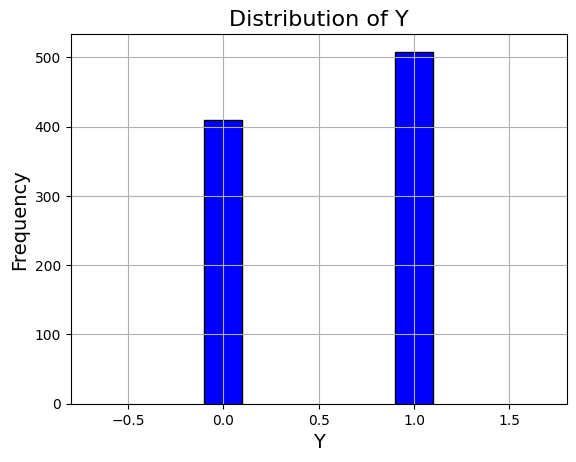

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display descriptive statistics of the target variable (Y) to summarize its distribution.
print("Descriptive statistics of Y:")
print(Y.describe())
print()

# Check for missing values in the target variable to ensure data completeness.
print("Missing values in Y:")
print(Y.isnull().sum())
print()

# Plot the distribution of the target variable (Y) to visualize its overall shape and spread.
bin_edges = np.linspace(Y.min() - 0.5, Y.max() + 0.5, num=3)  # Adjust bin edges for better centering

# Add some padding to the plot
plt.xlim(bin_edges[0] - 0.3, bin_edges[-1] + 0.3)
plt.bar(bin_edges[:-1] + 0.5, np.histogram(Y, bins=bin_edges)[0], width=0.2, align='center', color="blue", edgecolor="black")
plt.title("Distribution of Y", fontsize=16)
plt.xlabel("Y", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()



We observe that the target variable, which represents whether the patient has cardiopathy or not, is slightly imbalanced. There are slightly more positive cases than negative cases.

There are no missing values

### Exploration of pradictors X

,Age,Sexe,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


Predictors dimensions (X): (918, 11)
Total missing values in X: 0

Statistics for numeric predictors:
             count        mean         std   min     25%    50%    75%    max
Age          918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP    918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol  918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS    918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR        918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak      918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2 

Statistics for categorical predictors:
               count unique     top freq
Sexe             918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460


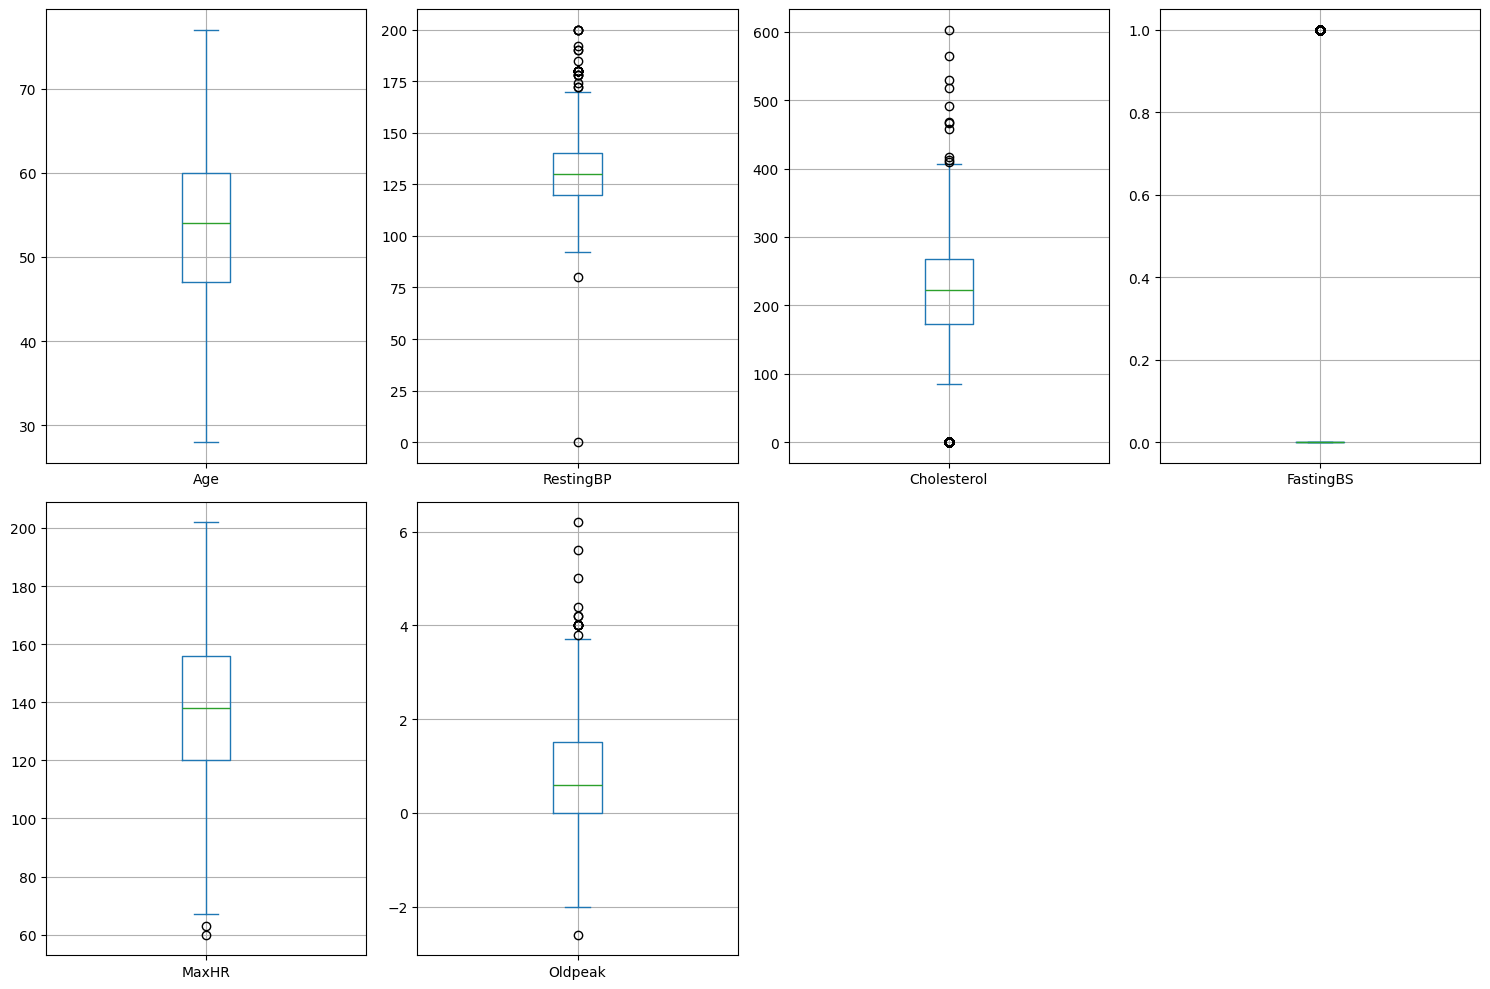

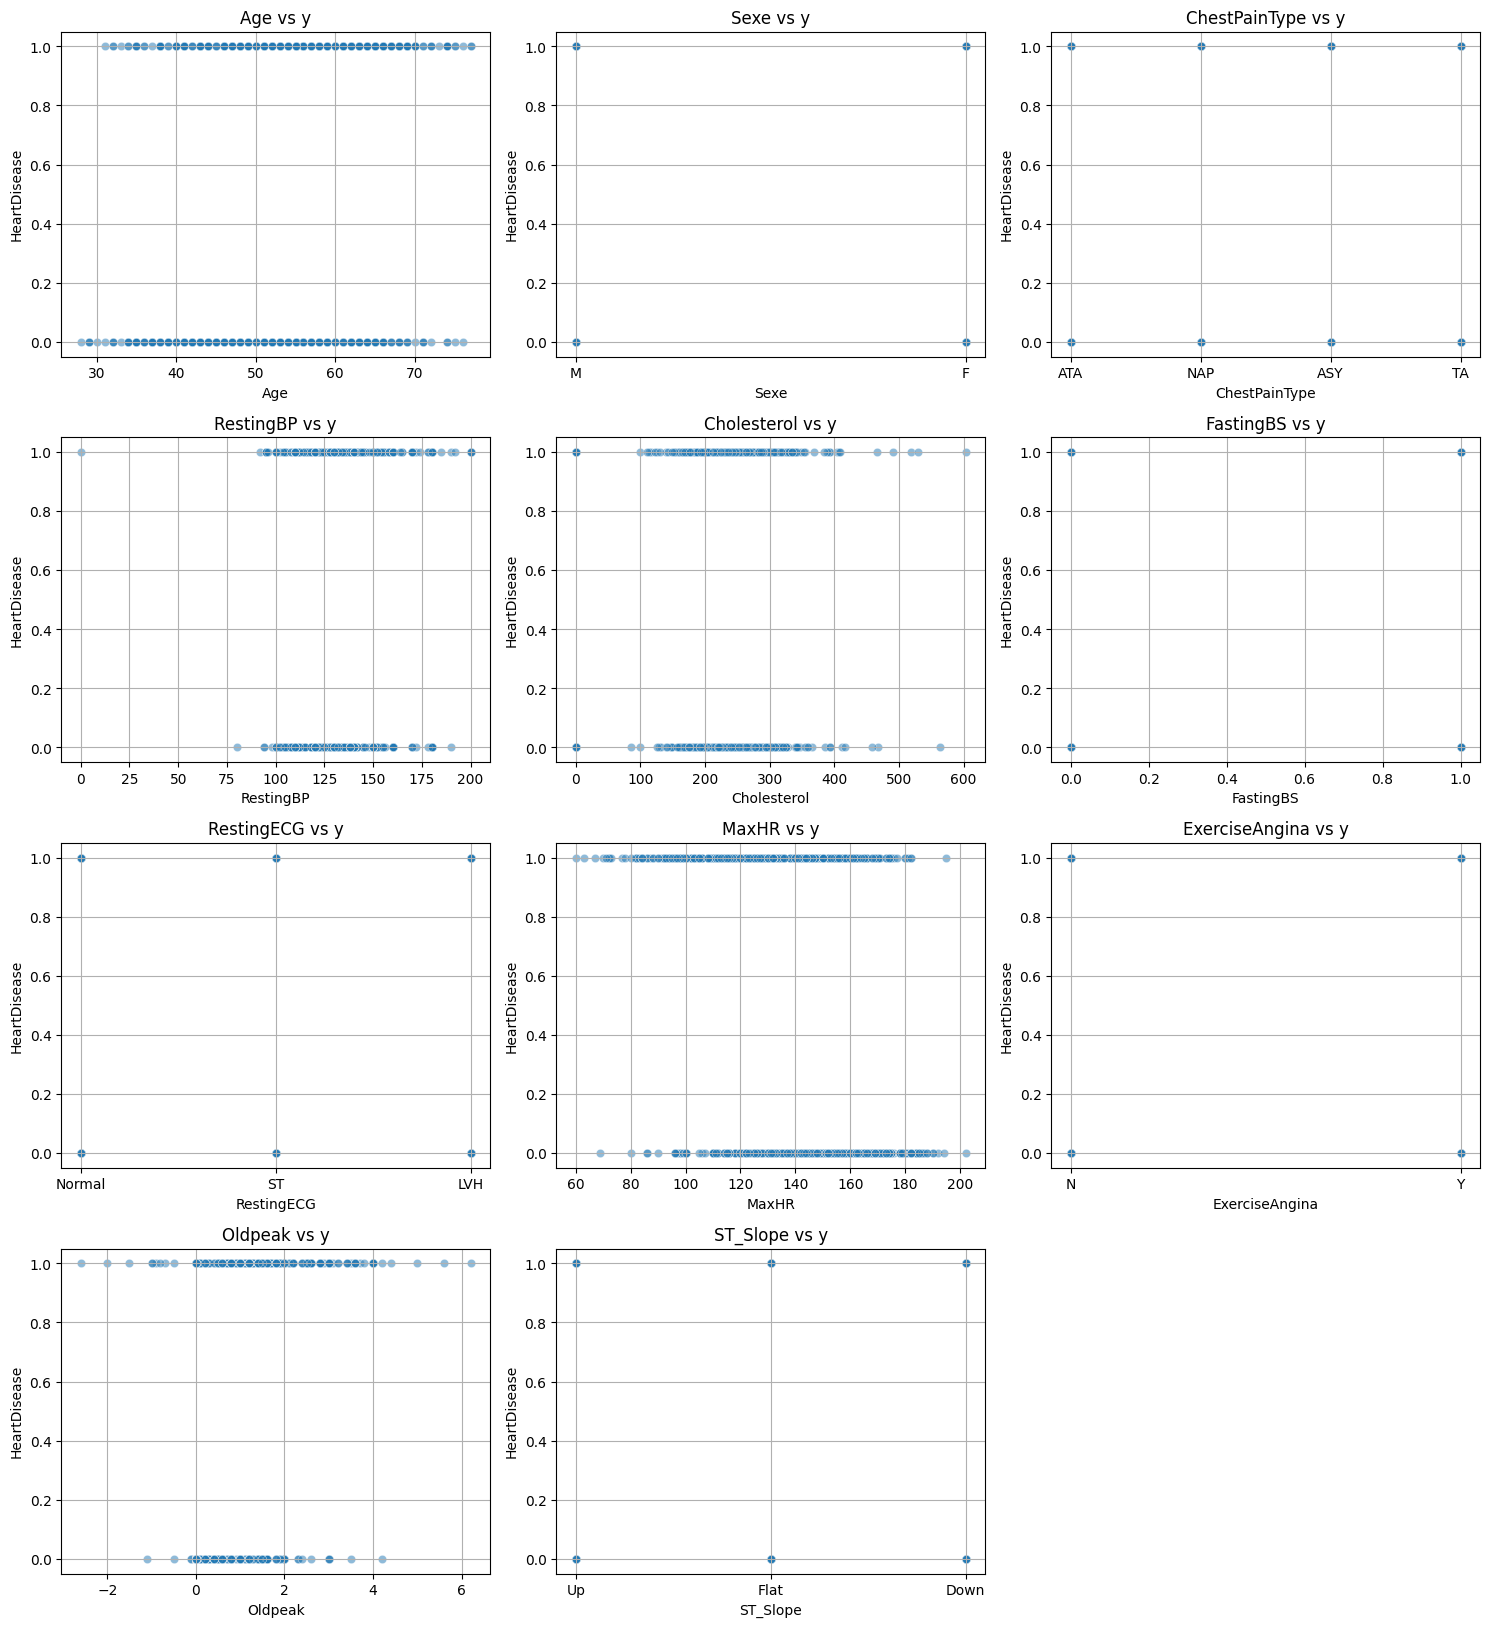

In [36]:
# Display the first few rows of the predictors DataFrame
display(X.head())

# Basic dataset information
print(f"Predictors dimensions (X): {X.shape}")
print(f"Total missing values in X: {X.isnull().sum().sum()}\n")

# Statistics for numeric and categorical features
print("Statistics for numeric predictors:")
print(X.describe().T, "\n")
print("Statistics for categorical predictors:")
print(X.select_dtypes(include=['object', 'category']).describe().T)

# Boxplots for numeric variables
X.select_dtypes(include=['float64', 'int64']).plot(
    kind='box', subplots=True, figsize=(15, 10), grid=True, layout=(-1, 4)
)
plt.tight_layout()
plt.show()

# Scatterplots of each predictor against the target
plt.figure(figsize=(15, 5 * np.ceil(len(X.columns) / 3)))
for i, feature in enumerate(X.columns, 1):
    plt.subplot(np.ceil(len(X.columns) // 2), 3, i)
    sns.scatterplot(x=X[feature], y=Y, alpha=0.5)
    plt.title(f'{feature} vs y')
    plt.grid(True)
plt.tight_layout()
plt.show()




Overall, the features are approximately normally distributed. Some features, such as RestingBP and FastingBS, exhibit a few outliers. For other features, the points beyond the whiskers are likely valid data points rather than outliers.

The scatterplots show that globally, the features do not exhibit strong and clearly visible distribution differences based on the target variable. However, some features, such as Cholesterol and MaxHR, show potential predictive power, although it is not immediately obvious.

There are no missing values

# Categorical features encoding

In [37]:
# Encode all categorical variables in the dataset
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode categorical variables
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(X_encoded.head())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sexe_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


Categorical features need to be encoded so that the model can apply mathematical operations on them. The categorical features in our dataset are all nominal (i.e., there is no inherent hierarchy or order among the categories), so the most appropriate encoding method is One-Hot Encoding

One-Hot Encoding works by creating a new binary column for each unique category in a feature, where each column takes the value 1 if the category is present in a given row, and 0 otherwise. This ensures that no ordinal relationship is introduced between categories, making it suitable for nominal data.

Finally, this process results in the creation of one column for each unique category across all categorical features, minus one column per feature as we apply drop_first=True to avoid multicollinearity (commonly known as the dummy variable trap). The total number of columns in our dataframe after encoding is 16.
